In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import time
import xarray as xr

import dask.array as da
from dask.diagnostics import ProgressBar
from dask.distributed import Client, LocalCluster


#### Import compiled_SUPERsnow.nc

In [2]:
fname = '~/Documents/projects/thesis/results/output/compiled_SUPERsnow.nc'

#ds full
ds = xr.open_dataset(fname,  chunks={'time':1,'x':1000,'y':1000})
ds.close()

#ds small
dsmall = ds.sel(time='2013')
dsmall.close()

ds = dsmall
ds.close()

#### test terrain layers

In [ ]:
# #brake filepath.......
# terrain_path = ''
# flist_terrain = sorted(glob.glob(terrain_path))
# flist_terrain

In [ ]:
# terrain = xr.open_dataset(flist_terrain[0]).rename({'Band1':'aspect'}) #, concat_dim='time', combine='nested', chunks={'x':1000, 'y':1000}, parallel=True)
# terrain

In [ ]:
# plt.imshow(terrain.aspect, cmap='Set2')

#### test histogram

In [ ]:
bigshape = (200000, 4000)
chunk_shape = (1000, 1000)
big_ones = da.ones(bigshape, chunks=chunk_shape)
big_ones


In [ ]:
big_calc = (big_ones * big_ones[::-1, ::-1]).mean()

with ProgressBar():
    result = big_calc.compute()
result

In [ ]:
mu = ds.snow.mean(dim=('x','y'))

with ProgressBar():
    result = mu.compute()
result


In [25]:
# mu = ds.snow.mean(dim=('x','y'))

# with ProgressBar():
#     result = mu.compute()
# result


def histogram(x):
    a = np.histogram(x[x !=0])#, bins=500)
    return a

# s = xr.apply_ufunc(histogram, ds.snow, dask= 'allowed') #'parallelized', output_dtypes=[np.int16])

In [32]:
with ProgressBar():
    s,b = xr.apply_ufunc(histogram, ds.snow.values, dask='parallelized', output_dtypes=[np.int16])


[########################################] | 100% Completed |  8.8s
[123837185  66791164  37825062  16191282   6039948   2377874   1076941
    555038    318199    146695] [1.0000e+00 7.0080e+02 1.4006e+03 2.1004e+03 2.8002e+03 3.5000e+03
 4.1998e+03 4.8996e+03 5.5994e+03 6.2992e+03 6.9990e+03]


(10,) (10,)


<BarContainer object of 10 artists>

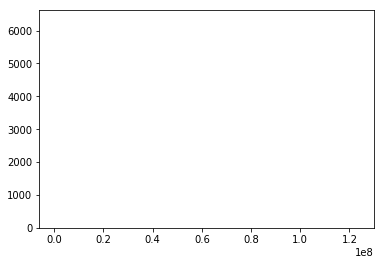

In [36]:
print(s.shape,b[:-1].shape)

# shist = s[0]
# shist
plt.bar(s, b[:-1])

In [6]:
# ds.snow.values(dim=('x','y')).shape
# ds.snow(dim=('x','y'))
ds.isel.snow(dim='time')

TypeError: 'DataArray' object is not callable

In [10]:
ds.snow.values(dim=('x','y'))

TypeError: 'numpy.ndarray' object is not callable